中間層の要素数は、独立な特徴量の数のようなものに対応している。我々が求めるautoencoderは、４と９を分離可能な最小の特徴量を持つものである。中間層の要素数が1個でははっきり分離してくれなかった。

In [4]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [5]:
import numpy as np

In [6]:
batch_size = 128
epochs = 200

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
keep_train_idx = np.logical_or(y_train == 4, y_train == 9)
keep_test_idx = np.logical_or(y_test ==4, y_test == 9)

x_train = x_train[keep_train_idx]
x_test = x_test[keep_test_idx]

In [8]:
x_train_vec = x_train.reshape(x_train.shape[0], 784)
x_test_vec = x_test.reshape(x_test.shape[0], 784)

ここでは中間層の要素数を12個に設定する

In [9]:
model = Sequential()
model.add(Dense(12, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(784, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                9420      
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               10192     
Total params: 19,612
Trainable params: 19,612
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_vec, x_train_vec,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_vec, x_test_vec))
score = model.evaluate(x_test_vec, x_test_vec, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 11791 samples, validate on 1991 samples
Epoch 1/200
11791/11791 [==============================] - 0s - loss: 0.1396 - acc: 0.0056 - val_loss: 0.0846 - val_acc: 0.0045
Epoch 2/200
11791/11791 [==============================] - 0s - loss: 0.0703 - acc: 0.0072 - val_loss: 0.0572 - val_acc: 0.0095
Epoch 3/200
11791/11791 [==============================] - 0s - loss: 0.0564 - acc: 0.0081 - val_loss: 0.0527 - val_acc: 0.0095
Epoch 4/200
11791/11791 [==============================] - 0s - loss: 0.0538 - acc: 0.0079 - val_loss: 0.0522 - val_acc: 0.0095
Epoch 5/200
11791/11791 [==============================] - 0s - loss: 0.0532 - acc: 0.0092 - val_loss: 0.0521 - val_acc: 0.0095
Epoch 6/200
11791/11791 [==============================] - 0s - loss: 0.0530 - acc: 0.0106 - val_loss: 0.0521 - val_acc: 0.0095
Epoch 7/200
11791/11791 [==============================] - 0s - loss: 0.0530 - acc: 0.0092 - val_loss: 0.0521 - val_acc: 0.0095
Epoch 8/200
11791/11791 [==============================

11791/11791 [==============================] - 0s - loss: 0.0434 - acc: 0.0108 - val_loss: 0.0394 - val_acc: 0.0110
Epoch 65/200
11791/11791 [==============================] - 0s - loss: 0.0435 - acc: 0.0101 - val_loss: 0.0395 - val_acc: 0.0100
Epoch 66/200
11791/11791 [==============================] - 0s - loss: 0.0435 - acc: 0.0103 - val_loss: 0.0394 - val_acc: 0.0100
Epoch 67/200
11791/11791 [==============================] - 0s - loss: 0.0434 - acc: 0.0109 - val_loss: 0.0393 - val_acc: 0.0100
Epoch 68/200
11791/11791 [==============================] - 0s - loss: 0.0434 - acc: 0.0106 - val_loss: 0.0392 - val_acc: 0.0100
Epoch 69/200
11791/11791 [==============================] - 0s - loss: 0.0434 - acc: 0.0092 - val_loss: 0.0392 - val_acc: 0.0110
Epoch 70/200
11791/11791 [==============================] - 0s - loss: 0.0434 - acc: 0.0095 - val_loss: 0.0392 - val_acc: 0.0100
Epoch 71/200
11791/11791 [==============================] - 0s - loss: 0.0432 - acc: 0.0095 - val_loss: 0.0391

11791/11791 [==============================] - 0s - loss: 0.0402 - acc: 0.0074 - val_loss: 0.0352 - val_acc: 0.0105
Epoch 128/200
11791/11791 [==============================] - 0s - loss: 0.0403 - acc: 0.0081 - val_loss: 0.0350 - val_acc: 0.0116
Epoch 129/200
11791/11791 [==============================] - 0s - loss: 0.0402 - acc: 0.0084 - val_loss: 0.0350 - val_acc: 0.0116
Epoch 130/200
11791/11791 [==============================] - 0s - loss: 0.0401 - acc: 0.0081 - val_loss: 0.0351 - val_acc: 0.0110
Epoch 131/200
11791/11791 [==============================] - 0s - loss: 0.0402 - acc: 0.0085 - val_loss: 0.0351 - val_acc: 0.0105
Epoch 132/200
11791/11791 [==============================] - 0s - loss: 0.0400 - acc: 0.0081 - val_loss: 0.0348 - val_acc: 0.0121
Epoch 133/200
11791/11791 [==============================] - 0s - loss: 0.0401 - acc: 0.0067 - val_loss: 0.0350 - val_acc: 0.0090
Epoch 134/200
11791/11791 [==============================] - 0s - loss: 0.0401 - acc: 0.0072 - val_loss:

11791/11791 [==============================] - 0s - loss: 0.0397 - acc: 0.0081 - val_loss: 0.0343 - val_acc: 0.0095
Epoch 191/200
11791/11791 [==============================] - 0s - loss: 0.0397 - acc: 0.0082 - val_loss: 0.0343 - val_acc: 0.0090
Epoch 192/200
11791/11791 [==============================] - 0s - loss: 0.0396 - acc: 0.0084 - val_loss: 0.0342 - val_acc: 0.0095
Epoch 193/200
11791/11791 [==============================] - 0s - loss: 0.0397 - acc: 0.0092 - val_loss: 0.0343 - val_acc: 0.0095
Epoch 194/200
11791/11791 [==============================] - 0s - loss: 0.0397 - acc: 0.0085 - val_loss: 0.0344 - val_acc: 0.0095
Epoch 195/200
11791/11791 [==============================] - 0s - loss: 0.0395 - acc: 0.0092 - val_loss: 0.0343 - val_acc: 0.0095
Epoch 196/200
11791/11791 [==============================] - 0s - loss: 0.0396 - acc: 0.0080 - val_loss: 0.0342 - val_acc: 0.0095
Epoch 197/200
11791/11791 [==============================] - 0s - loss: 0.0395 - acc: 0.0082 - val_loss:

中間要素数がきわどくなると、ロスがなかなか落ちにくくなるが、今日はこれくらいのエポック数で勘弁してやる。

## Testing results 

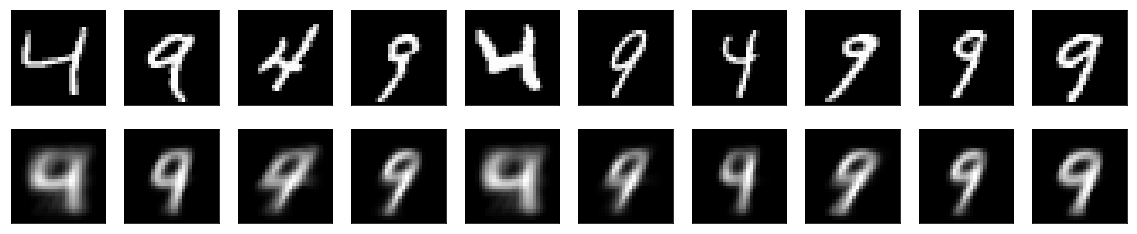

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    predicted = model.predict(x_train_vec[i:i+1]).reshape((28,28))
    plt.imshow(predicted)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

大局的な形状を優先的に再現してくれるものの、右上の部分が開いているかどうかというディテールについては、あまり区別してくれないため、出力を見て４か９かを判断するのは厳しい。このやり方では、要素数のみによる最適化はこのへんが限界なのか。